In [0]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.preprocessing  import StandardScaler,MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [0]:
# Apple stock data
df = pd.read_csv('https://raw.githubusercontent.com/suitedaces/stock-prediction/master/HistoricalQuotes.csv?token=AMECM5UBJW77O75R3GGYMBS6YAOZ6', index_col = 'Date')
df.rename(columns = {' Close/Last': 'Close/Last', ' Volume': 'Volume',  ' Open': 'Open', ' High': 'High', ' Low' : 'Low'}, inplace = True)
df[df.columns[0:]] = df[df.columns[0:]].replace('[\$,]', '', regex=True).astype(float)

In [7]:
df.info()
df.shape
df.columns.values

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 04/17/2020 to 04/19/2010
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2518 non-null   float64
 1   Volume      2518 non-null   float64
 2   Open        2518 non-null   float64
 3   High        2518 non-null   float64
 4   Low         2518 non-null   float64
dtypes: float64(5)
memory usage: 198.0+ KB


array(['Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype=object)

In [14]:
df_train = df.tail(2338)
df_train.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
07/31/2019,213.04,69281360.0,216.42,221.37,211.30
07/30/2019,208.78,33935720.0,208.76,210.16,207.31
07/29/2019,209.68,21673390.0,208.46,210.64,208.44
07/26/2019,207.74,17618870.0,207.48,209.73,207.14
07/25/2019,207.02,13909560.0,208.89,209.24,206.73


In [15]:
df_test = df.head(180)
df_test.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
04/17/2020,282.80,53812480.0,284.69,286.9450,276.8600
04/16/2020,286.69,39281290.0,287.38,288.1975,282.3502
04/15/2020,284.43,32788640.0,282.40,286.3300,280.6300
04/14/2020,287.05,48748670.0,280.00,288.2500,278.0500
04/13/2020,273.25,32755730.0,268.31,273.7000,265.8300


2338

In [137]:
# Data Cleaning
df.isna().any()

# Feature Scaling Normalization
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(df_train)

X_train, y_train = [],[]

for i in range(60, df_train.shape[0]):
    X_train.append(training_set_scaled[i-60:i])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((2278, 60, 5), (2278,))

In [138]:
# RNN
regressor = Sequential()

# Adding a LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 80, activation = 'relu'))
regressor.add(Dropout(0.2))
 
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2278/2278 [==============================] - 13s 6ms/step - loss: 0.0251
Epoch 2/100
2278/2278 [==============================] - 12s 5ms/step - loss: 0.0046
Epoch 3/100
2278/2278 [==============================] - 12s 5ms/step - loss: 0.0036
Epoch 4/100
2278/2278 [==============================] - 12s 5ms/step - loss: 0.0035
Epoch 5/100
2278/2278 [==============================] - 12s 5ms/step - loss: 0.0033
Epoch 6/100
2278/2278 [==============================] - 12s 5ms/step - loss: 0.0033
Epoch 7/100
2278/2278 [==============================] - 12s 5ms/step - loss: 0.0029
Epoch 8/100
2278/2278 [==============================] - 12s 5ms/step - loss: 0.0027
Epoch 9/100
2278/2278 [==============================] - 12s 5ms/step - loss: 0.0033
Epoch 10/100
2278/2278 [==============================] - 12s 5ms/step - loss: 0.0028
Epoch 11/100
2278/2278 [==============================] - 12s 5ms/step - loss: 0.0027
Epoch 12/100
2278/2278 [==============================] - 12s 5

In [139]:
regressor.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 60, 60)            15840     
_________________________________________________________________
dropout_37 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 60, 60)            29040     
_________________________________________________________________
dropout_38 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_39 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 80)              

In [140]:
df_test.head()


,Close/Last,Volume,Open,High,Low
Date,,,,,
04/17/2020,282.80,53812480.0,284.69,286.9450,276.8600
04/16/2020,286.69,39281290.0,287.38,288.1975,282.3502
04/15/2020,284.43,32788640.0,282.40,286.3300,280.6300
04/14/2020,287.05,48748670.0,280.00,288.2500,278.0500
04/13/2020,273.25,32755730.0,268.31,273.7000,265.8300


In [141]:
past_60days = df_train.tail(60)
df = past_60days.append(df_test, ignore_index = True)
df.head()

,Close/Last,Volume,Open,High,Low
0,35.9711,296797219.0,36.6171,36.6286,35.2043
1,36.7550,140474992.0,36.9328,37.4071,36.4086
2,37.0886,108260072.0,36.6986,37.1286,36.4514
3,36.8700,184252935.0,37.4971,37.5571,36.4128
4,36.9521,163169979.0,35.7843,36.9671,35.6786


In [142]:
scaler = StandardScaler()
inputs = scaler.fit_transform(df)
inputs

array([[-1.64828431e+00,  2.85532687e+00, -1.64433473e+00,
        -1.64808360e+00, -1.65011342e+00],
       [-1.64059761e+00,  8.30287012e-01, -1.64122564e+00,
        -1.64052047e+00, -1.63814914e+00],
       [-1.63732643e+00,  4.12966337e-01, -1.64353210e+00,
        -1.64322610e+00, -1.63772394e+00],
       ...,
       [-1.05171328e-01, -3.10751017e-01, -5.50938114e-02,
        -7.40568664e-02, -8.66435937e-02],
       [-4.46400626e-04, -4.60124727e-01,  1.91620058e-02,
         1.53547862e-03,  3.26483500e-03],
       [ 4.27967576e-02, -2.89700981e-01,  1.01591872e-01,
         1.14229374e-01,  5.40655809e-02]])

In [0]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
  x_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [144]:
x_test.shape, y_test.shape

((180, 60, 5), (180,))

In [145]:
y_pred = regressor.predict(x_test)
y_pred

array([[0.0042561 ],
       [0.3886651 ],
       [0.8659574 ],
       [0.9382242 ],
       [1.0250976 ],
       [1.0537621 ],
       [1.0656472 ],
       [1.0528884 ],
       [1.023769  ],
       [0.980716  ],
       [0.9261545 ],
       [0.86445487],
       [0.8017304 ],
       [0.7432128 ],
       [0.68919563],
       [0.6380838 ],
       [0.5911423 ],
       [0.5489094 ],
       [0.51180947],
       [0.47811034],
       [0.448339  ],
       [0.42466682],
       [0.4068063 ],
       [0.3952179 ],
       [0.38825464],
       [0.41587102],
       [0.4487849 ],
       [0.5110615 ],
       [0.58792734],
       [0.6291735 ],
       [0.6650388 ],
       [0.7165108 ],
       [0.7649286 ],
       [0.7844069 ],
       [0.77945364],
       [0.7536131 ],
       [0.723753  ],
       [0.7191198 ],
       [0.73874605],
       [0.7676517 ],
       [0.83631706],
       [0.91191006],
       [0.95948577],
       [0.9765575 ],
       [0.9967109 ],
       [1.0171809 ],
       [1.0346347 ],
       [1.048

In [129]:
scaler.scale_

array([1.01981451e+02, 7.71946419e+07, 1.01540866e+02, 1.02933703e+02,
       1.00657971e+02])

In [146]:
predicted_stock_price = sc.inverse_transform(y_pred)
predicted_stock_price=pd.DataFrame(predicted_stock_price)
real_stock_price = df_test.iloc[:, 0:1].values
predicted_stock_price

,0
0,34.100666
1,110.029137
2,204.303894
3,218.578049
4,235.737274
...,...
175,60.077183
176,56.609997
177,53.156265
178,49.784542


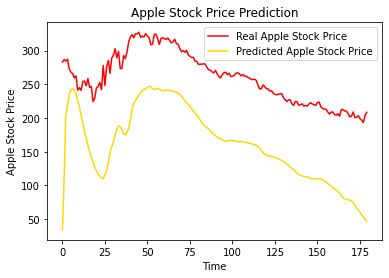

In [147]:
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'gold', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()